<a href="https://colab.research.google.com/github/SubashiniRamesh/Traffic_Sign_Prediction_internproject/blob/main/Traffic_sign_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"subhashiniramesh","key":"e7a4fff6f7a6b65219e26b9a231bff9f"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                           Student Performance Factors                          94KB  2024-09-02 10:53:57          17173        326  1.0              
abdulszz/spotify-most-streamed-songs                              Spotify Most Streamed Songs                          60KB  2024-09-07 18:23:14           4280         49  1.0              
cameronseamons/electronic-sales-sep2023-sep2024                   Customer purchase behavior - Electronic Sales Data  327KB  2024-09-23 01:54:36           1827         32  1.0              
waqi786/impact-of-virtual-reality-on-education    

In [7]:
! kaggle datasets download 'meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 609M/612M [00:07<00:00, 82.4MB/s]
100% 612M/612M [00:07<00:00, 87.6MB/s]


In [8]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [10]:
!pip install tensorflow
!pip install tensorflow keras
!pip install tensorflow sklearn
!pip install tensorflow matplotlib
!pip install tensorflow pandas
!pip install tensorflow pillow

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split #to split training and testing data
from keras.utils import to_categorical#to convert the labels present in y_train and t_test into one-hot encoding
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout#to create CNN
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [12]:
cur_path='/content/data'

In [32]:
import os
from PIL import Image
import numpy as np

cur_path='/content/data' # Set your current path to the dataset
classes = 43  # Assuming you have 43 classes
data = []
labels = []

# Initialize a counter for total images
total_images = 0

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))  # Use os.path.join for portability
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)

            # Increment the counter for each successfully loaded image
            total_images += 1

        except Exception as e:
            print(f"Error loading image {a}: {e}")

print(f"Total number of images loaded: {total_images}")


Total number of images loaded: 39209


In [33]:
# After loading images
data = np.array(data)
labels = np.array(labels)

print(f"Loaded data shape: {data.shape}, Loaded labels shape: {labels.shape}")

# Before saving
print(f"Number of images to save: {len(data)}")
np.save('/content/data/training/data', data)
np.save('/content/data/training/target', labels)

# Load back and check shapes
data = np.load('/content/data/training/data.npy')
labels = np.load('/content/data/training/target.npy')
print(data.shape, labels.shape)


Loaded data shape: (39209, 30, 30, 3), Loaded labels shape: (39209,)
Number of images to save: 39209
(39209, 30, 30, 3) (39209,)


In [34]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [35]:
from sklearn.model_selection import train_test_split

# Split the data and labels into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (31367, 30, 30, 3)
y_train shape: (31367,)
X_test shape: (7842, 30, 30, 3)
y_test shape: (7842,)


In [36]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in labels:", np.unique(labels))



Unique values in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Unique values in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Unique values in labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [37]:
#Convert labels to onehot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [38]:
import numpy as np

# Check the distribution of labels (class-wise counts)
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)

# Print the class distribution
class_distribution = dict(zip(unique, counts))
print("Class Distribution in Training Set:")
for cls, count in class_distribution.items():
    print(f"Class {cls}: {count} samples")


Class Distribution in Training Set:
Class 0: 169 samples
Class 1: 1781 samples
Class 2: 1799 samples
Class 3: 1134 samples
Class 4: 1578 samples
Class 5: 1485 samples
Class 6: 332 samples
Class 7: 1143 samples
Class 8: 1147 samples
Class 9: 1189 samples
Class 10: 1619 samples
Class 11: 1040 samples
Class 12: 1691 samples
Class 13: 1730 samples
Class 14: 614 samples
Class 15: 513 samples
Class 16: 329 samples
Class 17: 884 samples
Class 18: 982 samples
Class 19: 176 samples
Class 20: 286 samples
Class 21: 261 samples
Class 22: 313 samples
Class 23: 411 samples
Class 24: 203 samples
Class 25: 1181 samples
Class 26: 467 samples
Class 27: 193 samples
Class 28: 415 samples
Class 29: 212 samples
Class 30: 349 samples
Class 31: 623 samples
Class 32: 201 samples
Class 33: 576 samples
Class 34: 348 samples
Class 35: 983 samples
Class 36: 317 samples
Class 37: 161 samples
Class 38: 1627 samples
Class 39: 235 samples
Class 40: 289 samples
Class 41: 186 samples
Class 42: 195 samples


In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# Building model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Adding early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
eps = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3548 - loss: 3.1493 - val_accuracy: 0.8860 - val_loss: 0.4272
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7973 - loss: 0.7051 - val_accuracy: 0.9518 - val_loss: 0.1795
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8782 - loss: 0.4223 - val_accuracy: 0.9614 - val_loss: 0.1563
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9004 - loss: 0.3383 - val_accuracy: 0.9563 - val_loss: 0.1538
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9242 - loss: 0.2754 - val_accuracy: 0.9746 - val_loss: 0.0946
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9268 - loss: 0.2751 - val_accuracy: 0.9861 - val_loss: 0.0531
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9319 - loss: 0.2469 - val_accuracy: 0.9755 - val_loss: 0.0861
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9407 - loss: 0.2153 - val_accuracy:

In [40]:
print(history.history)

{'accuracy': [0.5570504069328308, 0.830586314201355, 0.8853890895843506, 0.9083431363105774, 0.9211273193359375, 0.9303089380264282, 0.9267382621765137, 0.9395861625671387, 0.9385660290718079, 0.9423598051071167, 0.9430930614471436], 'loss': [1.7556484937667847, 0.5894647836685181, 0.39565572142601013, 0.31587761640548706, 0.2841520309448242, 0.25617310404777527, 0.27001839876174927, 0.22046080231666565, 0.2400163859128952, 0.22007644176483154, 0.22042237222194672], 'val_accuracy': [0.8859984874725342, 0.9517980217933655, 0.9613618850708008, 0.956261157989502, 0.9746237993240356, 0.9861004948616028, 0.9755164384841919, 0.9848253130912781, 0.9779393076896667, 0.9803621768951416, 0.9871206283569336], 'val_loss': [0.4271984398365021, 0.17949162423610687, 0.15634463727474213, 0.15377745032310486, 0.09463872760534286, 0.05305195227265358, 0.08609222620725632, 0.05922666937112808, 0.08200947940349579, 0.06980951130390167, 0.05733776092529297]}


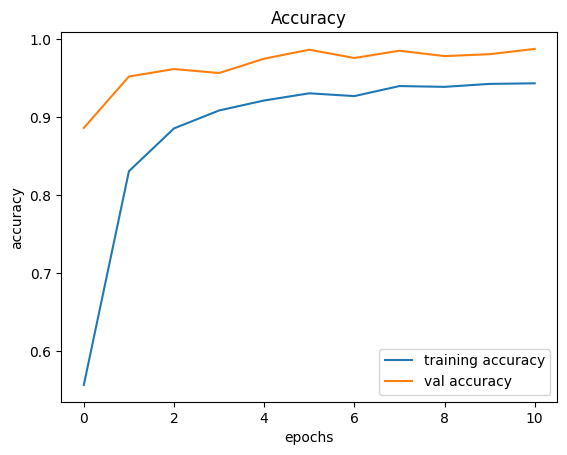

In [41]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

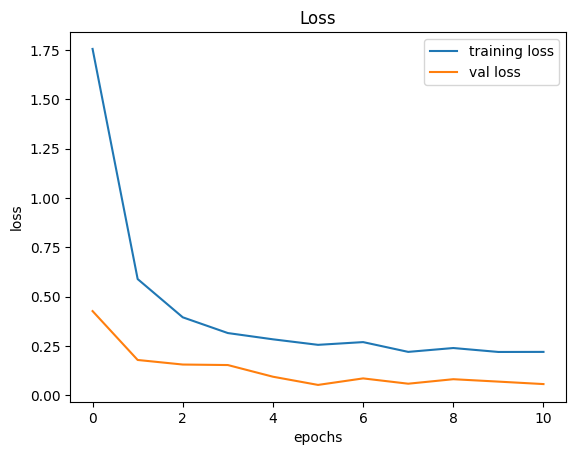

In [42]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [43]:
import numpy as np
import pandas as pd
from PIL import Image
import os

def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    for img in imgs:
        try:
            image_path = os.path.join('/content/data/', img)  # Corrected file path
            image = Image.open(image_path)
            image = image.resize((30, 30))
            data.append(np.array(image))
        except Exception as e:
            print(f"Error loading image {img}: {e}")
    X_test = np.array(data)
    return X_test, label

# Example usage
test_csv_path = '/content/data/Test.csv'  # Corrected file path
X_test, label = testing(test_csv_path)


In [44]:
X_test

array([[[[116, 140, 175],
         [116, 138, 171],
         [119, 138, 173],
         ...,
         [102, 119, 150],
         [101, 122, 149],
         [ 93, 112, 139]],

        [[116, 142, 177],
         [116, 141, 175],
         [117, 141, 174],
         ...,
         [120, 143, 178],
         [122, 144, 176],
         [122, 142, 174]],

        [[118, 142, 174],
         [116, 141, 175],
         [114, 140, 172],
         ...,
         [121, 144, 181],
         [122, 144, 180],
         [119, 142, 178]],

        ...,

        [[117, 137, 168],
         [115, 135, 165],
         [116, 135, 164],
         ...,
         [116, 138, 170],
         [116, 136, 168],
         [118, 139, 171]],

        [[116, 136, 166],
         [115, 134, 167],
         [115, 133, 165],
         ...,
         [114, 135, 168],
         [116, 136, 166],
         [115, 139, 167]],

        [[112, 135, 166],
         [111, 134, 165],
         [119, 135, 166],
         ...,
         [115, 137, 166],
        

In [45]:
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([16,  1, 38, ...,  6,  7, 10])

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9475851148060174


In [47]:
model.save("/content/training/TSR.h5")

In [48]:
import os
os.chdir(r'/content/data')
from keras.models import load_model
model = load_model('/content/training/TSR.h5')

In [49]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted traffic sign is:  Speed limit (120km/h)


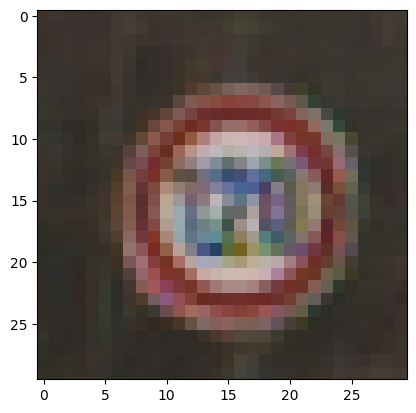

In [58]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=1)
    return image,Y_pred
plot,prediction = test_on_img(r'/content/data/Test/00571.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()